In [ ]:
# Cell 1 – Imports and data loading

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")

# Change path if needed
DATA_PATH = "//content//bank_join_common (1).csv"

df = pd.read_csv(DATA_PATH)
df.head()

,age,campaign,contact,default,duration,education,education_raw,housing,job,loan,marital,month,pdays,poutcome,previous,y
0,54,1,cellular,no,547,secondary,secondary,yes,technician,no,married,apr,626,failure,2,yes
1,43,7,cellular,no,128,unknown,unknown,yes,blue-collar,no,married,may,999,unknown,0,no
2,49,2,unknown,no,265,secondary,secondary,yes,blue-collar,yes,married,may,-1,unknown,0,no
3,46,1,telephone,no,542,secondary,secondary,no,unemployed,no,married,aug,78,failure,5,no
4,30,2,cellular,no,245,primary,basic.9y,yes,blue-collar,no,married,jul,999,unknown,0,no


In [ ]:
# Cell 2 – Basic info and dtypes

print("Shape:", df.shape)
print("\nColumns:\n", df.columns.tolist())

print("\nData types:")
print(df.dtypes)

print("\nSample rows:")
display(df.head())

Shape: (86399, 16)

Columns:
 ['age', 'campaign', 'contact', 'default', 'duration', 'education', 'education_raw', 'housing', 'job', 'loan', 'marital', 'month', 'pdays', 'poutcome', 'previous', 'y']

Data types:
age               int64
campaign          int64
contact          object
default          object
duration          int64
education        object
education_raw    object
housing          object
job              object
loan             object
marital          object
month            object
pdays             int64
poutcome         object
previous          int64
y                object
dtype: object

Sample rows:


,age,campaign,contact,default,duration,education,education_raw,housing,job,loan,marital,month,pdays,poutcome,previous,y
0,54,1,cellular,no,547,secondary,secondary,yes,technician,no,married,apr,626,failure,2,yes
1,43,7,cellular,no,128,unknown,unknown,yes,blue-collar,no,married,may,999,unknown,0,no
2,49,2,unknown,no,265,secondary,secondary,yes,blue-collar,yes,married,may,-1,unknown,0,no
3,46,1,telephone,no,542,secondary,secondary,no,unemployed,no,married,aug,78,failure,5,no
4,30,2,cellular,no,245,primary,basic.9y,yes,blue-collar,no,married,jul,999,unknown,0,no


In [ ]:
# Cell 3 – Missing values & basic stats

print("Missing values per column:\n")
print(df.isna().sum())

# Numeric summary
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("\nNumeric columns:", numeric_cols)
display(df[numeric_cols].describe().T)

# Categorical summary
cat_cols = df.select_dtypes(include=["object"]).columns.tolist()
print("\nCategorical columns:", cat_cols)
for c in cat_cols:
    print(f"\nValue counts for {c}:")
    print(df[c].value_counts(normalize=True).head(10))

Missing values per column:

age              0
campaign         0
contact          0
default          0
duration         0
education        0
education_raw    0
housing          0
job              0
loan             0
marital          0
month            0
pdays            0
poutcome         0
previous         0
y                0
dtype: int64

Numeric columns: ['age', 'campaign', 'duration', 'pdays', 'previous']


,count,mean,std,min,25%,50%,75%,max
age,86399.0,40.501372,10.534861,17.0,32.0,39.0,48.0,98.0
campaign,86399.0,2.670286,2.947825,1.0,1.0,2.0,3.0,63.0
duration,86399.0,258.221206,258.362746,0.0,103.0,180.0,319.0,4918.0
pdays,86399.0,479.864616,483.829445,-1.0,-1.0,246.0,999.0,999.0
previous,86399.0,0.386127,1.713060,0.0,0.0,0.0,0.0,275.0



Categorical columns: ['contact', 'default', 'education', 'education_raw', 'housing', 'job', 'loan', 'marital', 'month', 'poutcome', 'y']

Value counts for contact:
contact
cellular     0.641547
telephone    0.207757
unknown      0.150696
Name: proportion, dtype: float64

Value counts for default:
default
no         0.891029
unknown    0.099503
yes        0.009468
Name: proportion, dtype: float64

Value counts for education:
education
secondary    0.439357
tertiary     0.294784
primary      0.224331
unknown      0.041528
Name: proportion, dtype: float64

Value counts for education_raw:
education_raw
secondary              0.268545
tertiary               0.153949
university.degree      0.140835
high.school            0.110129
primary                0.079295
basic.9y               0.069966
professional.course    0.060684
basic.4y               0.048334
unknown                0.041528
basic.6y               0.026528
Name: proportion, dtype: float64

Value counts for housing:
housing
yes  

y
no     76470
yes     9929
Name: count, dtype: int64

Proportion of positive class (y = yes):
0.1149203115776803


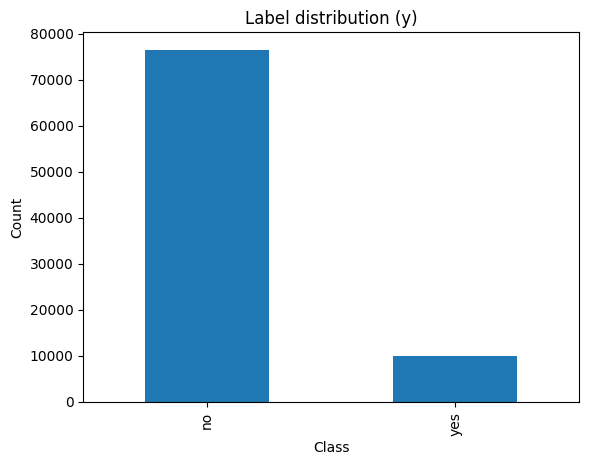

In [ ]:
# Cell 4 – Create cleaned label y_binary and basic label distribution

df["y_binary"] = (df["y"] == "yes").astype(int)

print(df["y"].value_counts())
print("\nProportion of positive class (y = yes):")
print(df["y_binary"].mean())

# Bar plot of label distribution
fig, ax = plt.subplots()
df["y"].value_counts().plot(kind="bar", ax=ax)
ax.set_title("Label distribution (y)")
ax.set_xlabel("Class")
ax.set_ylabel("Count")
plt.show()

Numeric columns: ['age', 'campaign', 'duration', 'pdays', 'previous', 'y_binary']


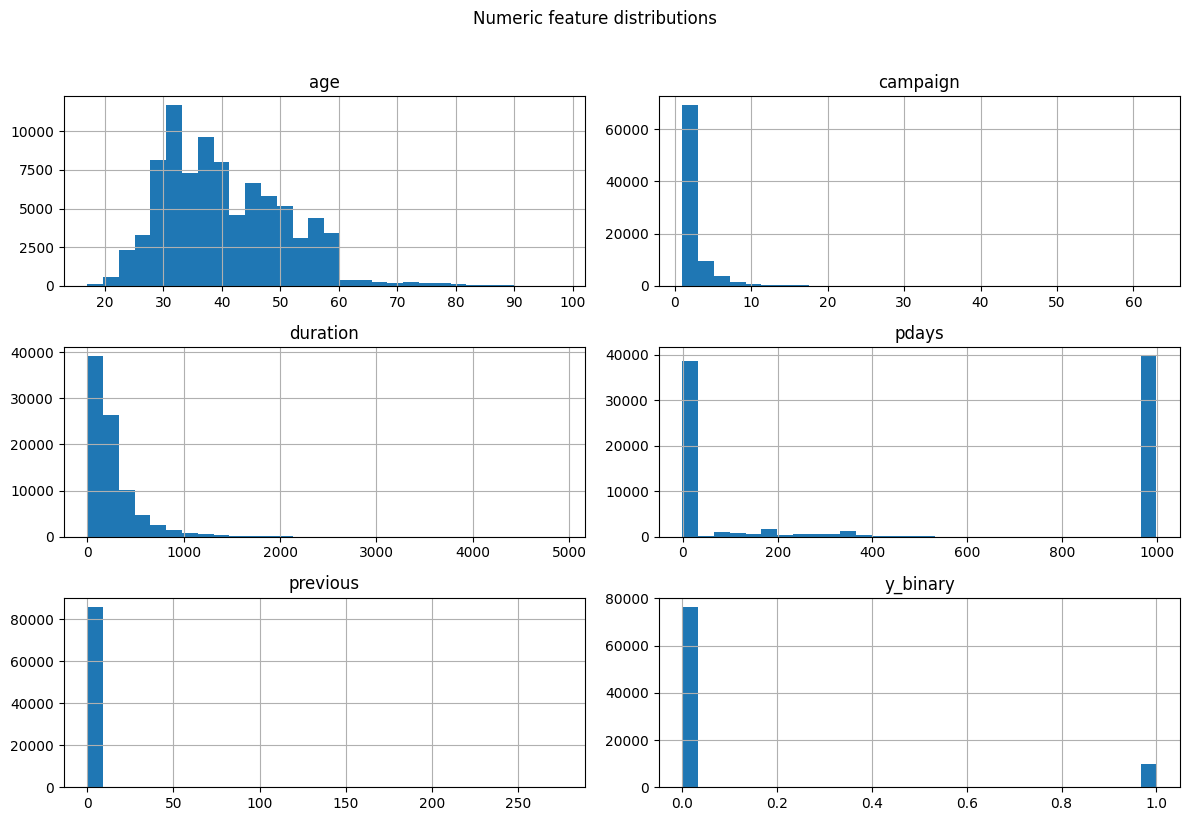

In [ ]:
# Cell 5 – Histograms for main numeric features

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("Numeric columns:", numeric_cols)

df[numeric_cols].hist(figsize=(12, 8), bins=30)
plt.suptitle("Numeric feature distributions", y=1.02)
plt.tight_layout()
plt.show()

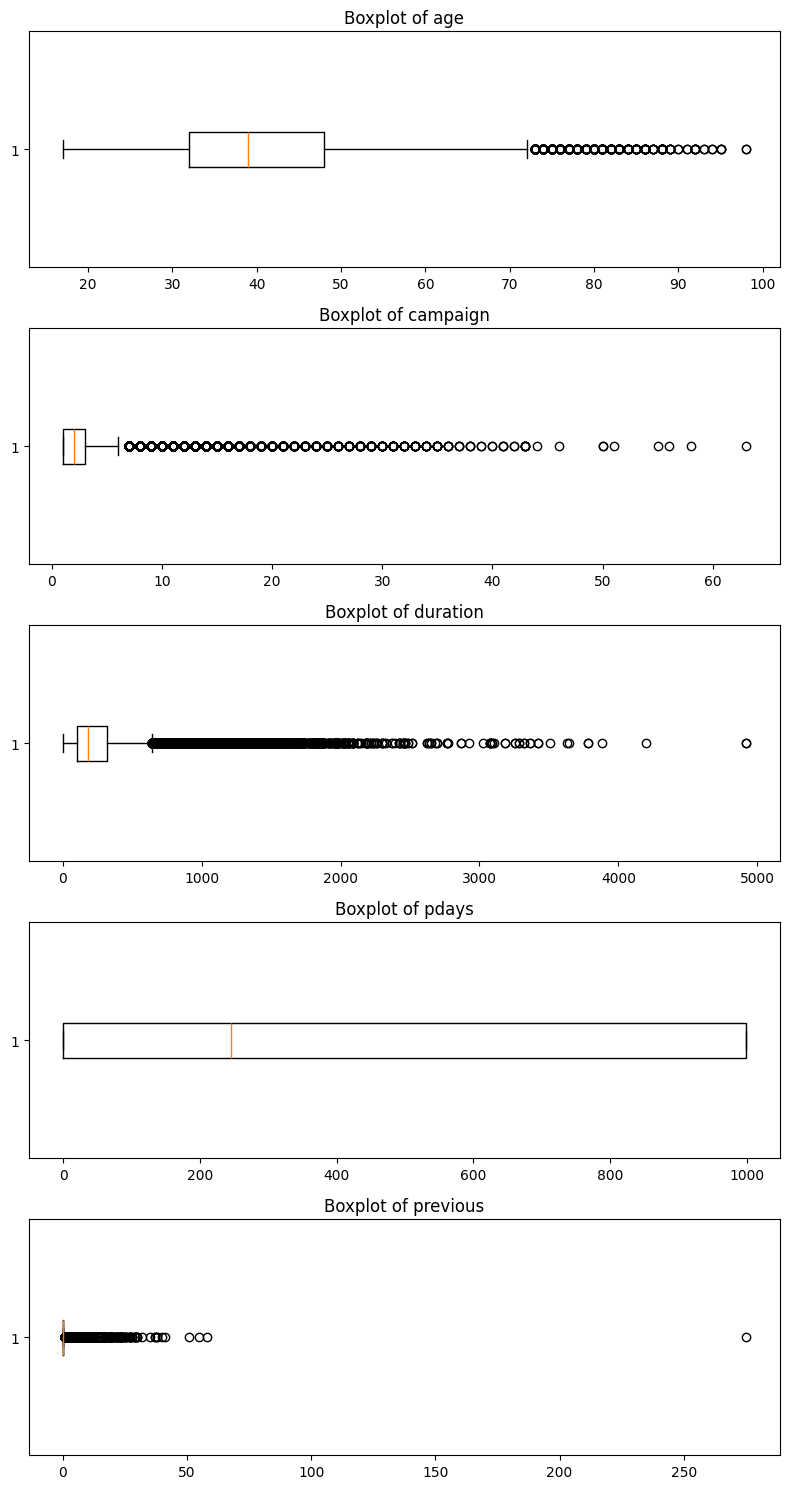

In [ ]:
# Cell 6 – Boxplots to check outliers in key numeric features

key_numeric = ["age", "campaign", "duration", "pdays", "previous"]
key_numeric = [c for c in key_numeric if c in df.columns]

fig, axes = plt.subplots(len(key_numeric), 1, figsize=(8, 3*len(key_numeric)))
if len(key_numeric) == 1:
    axes = [axes]

for ax, col in zip(axes, key_numeric):
    ax.boxplot(df[col].dropna(), vert=False)
    ax.set_title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

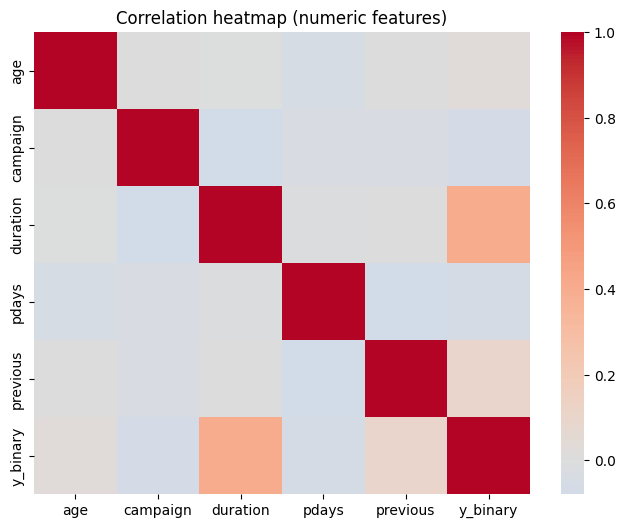

In [ ]:
# Cell 7 – Correlation heatmap for numeric features

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
corr = df[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=False, cmap="coolwarm", center=0)
plt.title("Correlation heatmap (numeric features)")
plt.show()


=== contact vs y_binary ===


,y_binary
contact,
cellular,0.148334
telephone,0.065571
unknown,0.040707


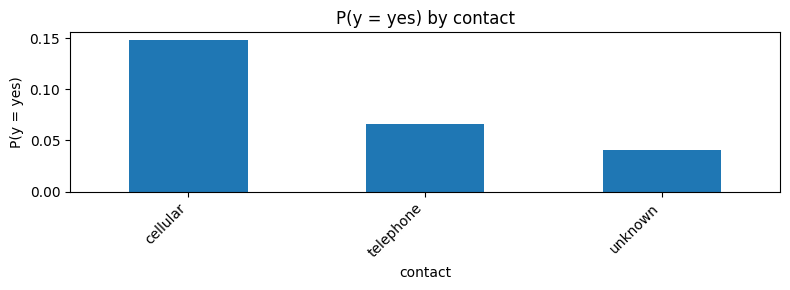


=== poutcome vs y_binary ===


,y_binary
poutcome,
success,0.649098
other,0.166848
failure,0.133617
unknown,0.090000


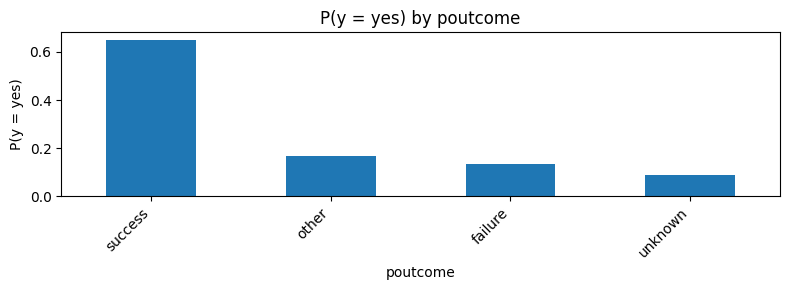


=== month vs y_binary ===


,y_binary
month,
mar,0.512219
dec,0.477273
sep,0.456919
oct,0.438187
apr,0.200575
feb,0.166478
aug,0.108089
jun,0.103668
nov,0.101474


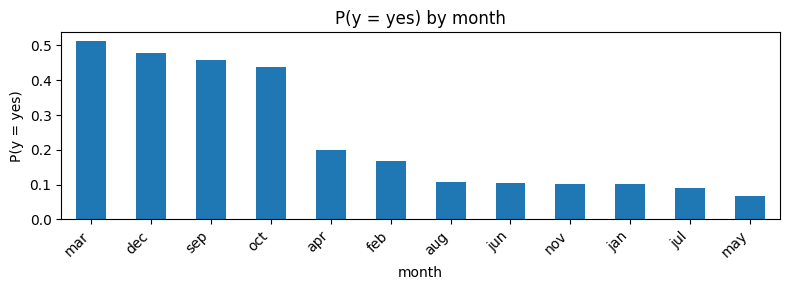


=== housing vs y_binary ===


,y_binary
housing,
no,0.139007
unknown,0.108081
yes,0.095106


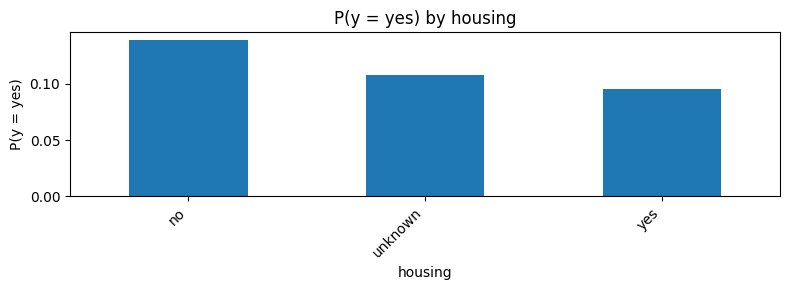


=== loan vs y_binary ===


,y_binary
loan,
no,0.120347
unknown,0.108081
yes,0.086496


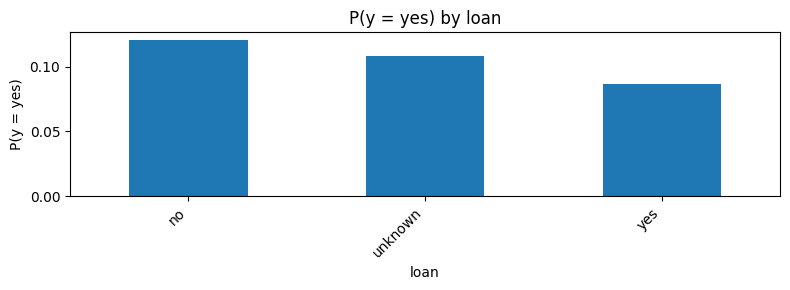


=== marital vs y_binary ===


,y_binary
marital,
unknown,0.150000
single,0.145004
divorced,0.111824
married,0.101396


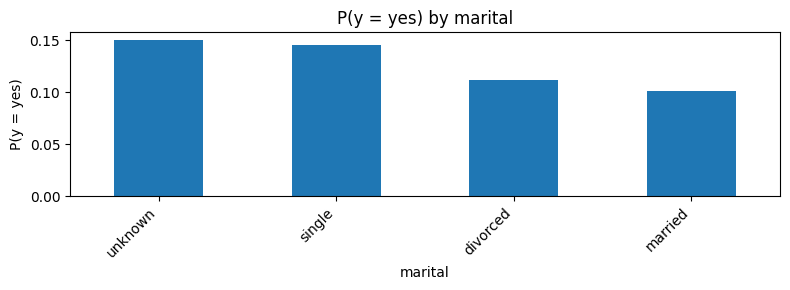


=== job vs y_binary ===


,y_binary
job,
student,0.300055
retired,0.238454
unemployed,0.149331
management,0.131562
admin.,0.127172
unknown,0.114887
self-employed,0.112000
technician,0.109484
housemaid,0.093478


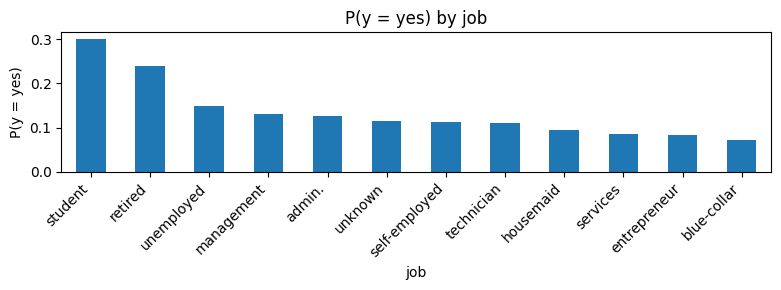

In [ ]:
# Cell 8 – Target vs important categorical features (contact, poutcome, month, housing, loan, marital, job)

cat_cols = ["contact", "poutcome", "month", "housing", "loan", "marital", "job"]
cat_cols = [c for c in cat_cols if c in df.columns]

for col in cat_cols:
    print(f"\n=== {col} vs y_binary ===")
    # conversion rate per category
    conv = df.groupby(col)["y_binary"].mean().sort_values(ascending=False)
    display(conv)

    plt.figure(figsize=(8, 3))
    conv.plot(kind="bar")
    plt.ylabel("P(y = yes)")
    plt.title(f"P(y = yes) by {col}")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()


=== contact vs y_binary ===


,y_binary
contact,
cellular,0.148334
telephone,0.065571
unknown,0.040707


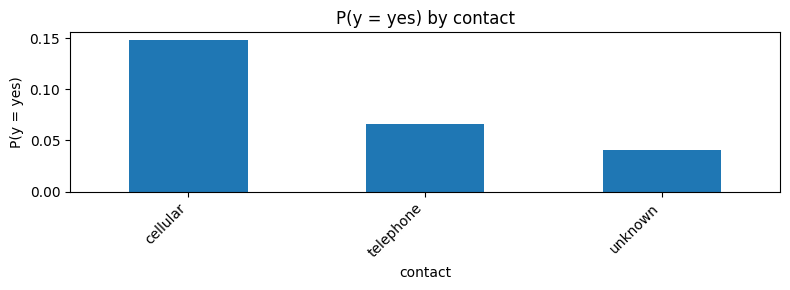


=== poutcome vs y_binary ===


,y_binary
poutcome,
success,0.649098
other,0.166848
failure,0.133617
unknown,0.090000


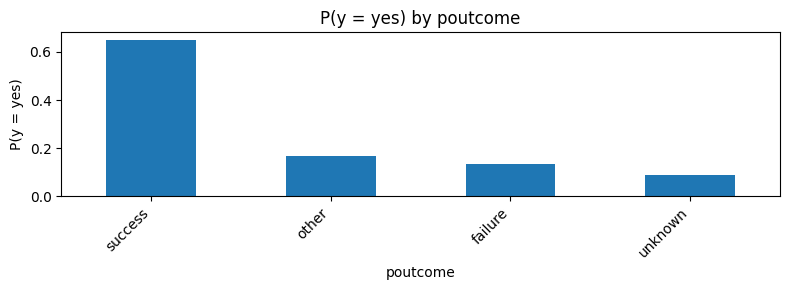


=== month vs y_binary ===


,y_binary
month,
mar,0.512219
dec,0.477273
sep,0.456919
oct,0.438187
apr,0.200575
feb,0.166478
aug,0.108089
jun,0.103668
nov,0.101474


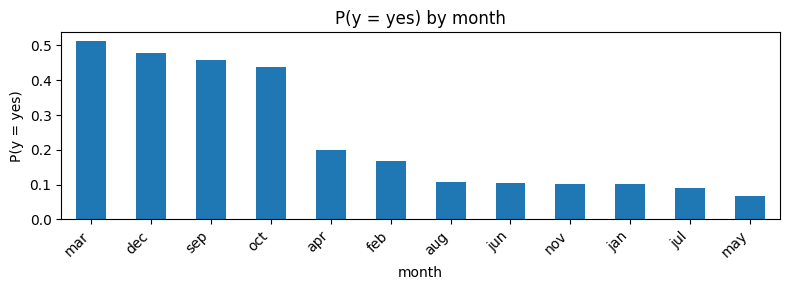


=== housing vs y_binary ===


,y_binary
housing,
no,0.139007
unknown,0.108081
yes,0.095106


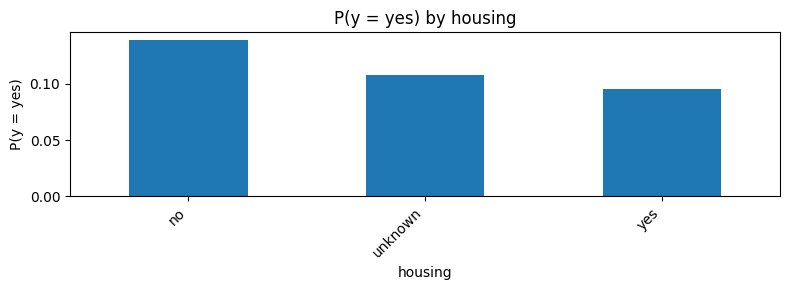


=== loan vs y_binary ===


,y_binary
loan,
no,0.120347
unknown,0.108081
yes,0.086496


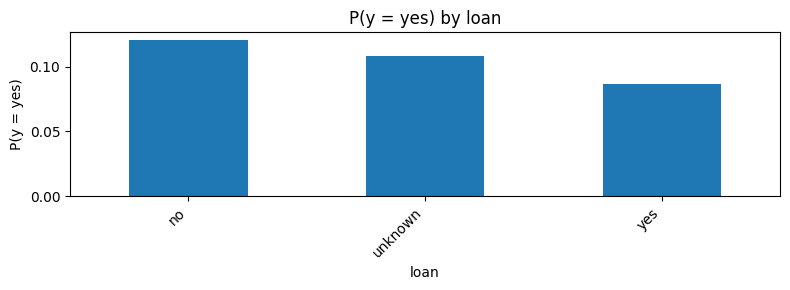


=== marital vs y_binary ===


,y_binary
marital,
unknown,0.150000
single,0.145004
divorced,0.111824
married,0.101396


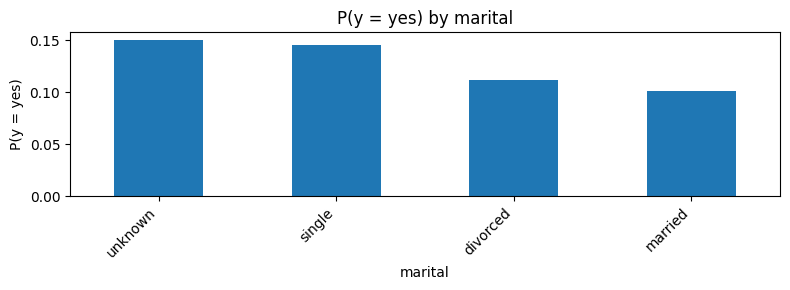


=== job vs y_binary ===


,y_binary
job,
student,0.300055
retired,0.238454
unemployed,0.149331
management,0.131562
admin.,0.127172
unknown,0.114887
self-employed,0.112000
technician,0.109484
housemaid,0.093478


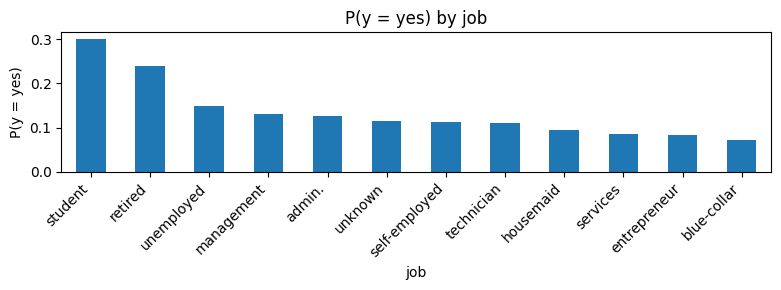

In [ ]:
# Cell 8 – Target vs important categorical features (contact, poutcome, month, housing, loan, marital, job)

cat_cols = ["contact", "poutcome", "month", "housing", "loan", "marital", "job"]
cat_cols = [c for c in cat_cols if c in df.columns]

for col in cat_cols:
    print(f"\n=== {col} vs y_binary ===")
    # conversion rate per category
    conv = df.groupby(col)["y_binary"].mean().sort_values(ascending=False)
    display(conv)

    plt.figure(figsize=(8, 3))
    conv.plot(kind="bar")
    plt.ylabel("P(y = yes)")
    plt.title(f"P(y = yes) by {col}")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

P(y = yes) by campaign_bucket:


/tmp/ipython-input-3950513656.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conv_campaign = df.groupby("campaign_bucket")["y_binary"].mean()
/tmp/ipython-input-3950513656.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conv_pdays = df.groupby("pdays_bucket")["y_binary"].mean()


,y_binary
campaign_bucket,
=1,0.138152
=2,0.113196
=3,0.109740
4-5,0.086514
6-10,0.064317
>10,0.035835



P(y = yes) by pdays_bucket:


,y_binary
pdays_bucket,
0-7,0.622222
8-30,0.476298
31-90,0.420755
91-998,0.112831
999=never,NaN


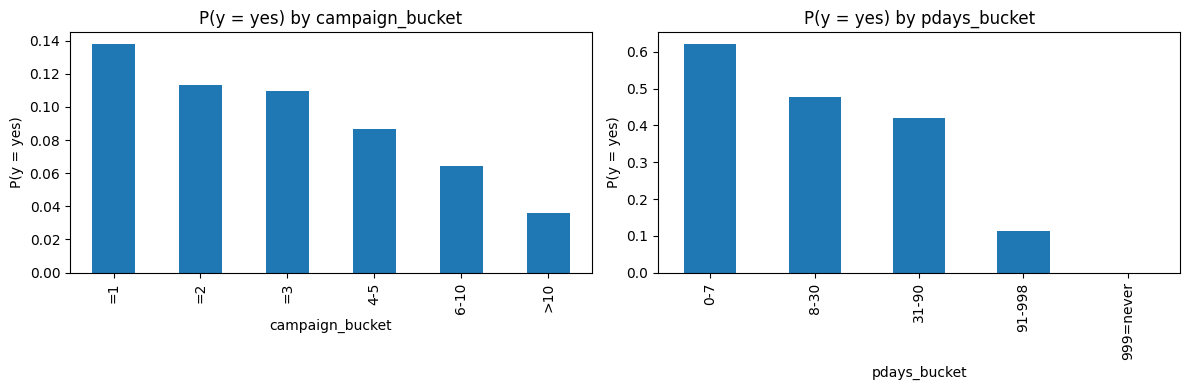

In [ ]:
# Cell 9 – Bucketed features: campaign and pdays, and their conversion rates

# Campaign buckets (number of call attempts)
bins_campaign = [0, 1, 2, 3, 5, 10, np.inf]
labels_campaign = ["=1", "=2", "=3", "4-5", "6-10", ">10"]
df["campaign_bucket"] = pd.cut(df["campaign"], bins=bins_campaign, labels=labels_campaign, right=True)

# Pdays buckets: recent contact vs never (999)
bins_pdays = [-1, 7, 30, 90, 999, np.inf]
labels_pdays = ["0-7", "8-30", "31-90", "91-998", "999=never"]
df["pdays_bucket"] = pd.cut(df["pdays"], bins=bins_pdays, labels=labels_pdays, right=True)

# Conversion rates
conv_campaign = df.groupby("campaign_bucket")["y_binary"].mean()
conv_pdays = df.groupby("pdays_bucket")["y_binary"].mean()

print("P(y = yes) by campaign_bucket:")
display(conv_campaign)

print("\nP(y = yes) by pdays_bucket:")
display(conv_pdays)

# Plots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

conv_campaign.plot(kind="bar", ax=axes[0])
axes[0].set_title("P(y = yes) by campaign_bucket")
axes[0].set_ylabel("P(y = yes)")
axes[0].set_xlabel("campaign_bucket")

conv_pdays.plot(kind="bar", ax=axes[1])
axes[1].set_title("P(y = yes) by pdays_bucket")
axes[1].set_ylabel("P(y = yes)")
axes[1].set_xlabel("pdays_bucket")

plt.tight_layout()
plt.show()

/tmp/ipython-input-3612003164.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(


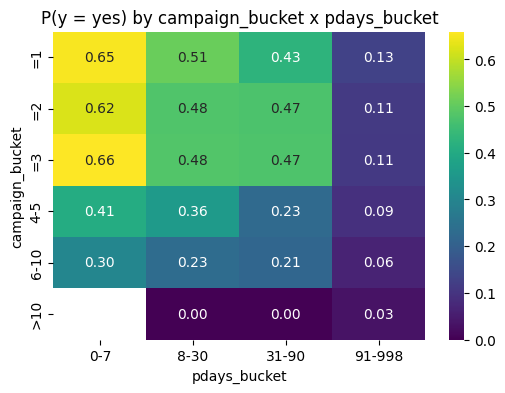

In [ ]:
# Cell 10 – 2D interaction heatmap: campaign_bucket x pdays_bucket

pivot_conv = (
    df.pivot_table(
        index="campaign_bucket",
        columns="pdays_bucket",
        values="y_binary",
        aggfunc="mean"
    )
)

plt.figure(figsize=(6, 4))
sns.heatmap(pivot_conv, annot=True, fmt=".2f", cmap="viridis")
plt.title("P(y = yes) by campaign_bucket x pdays_bucket")
plt.ylabel("campaign_bucket")
plt.xlabel("pdays_bucket")
plt.show()

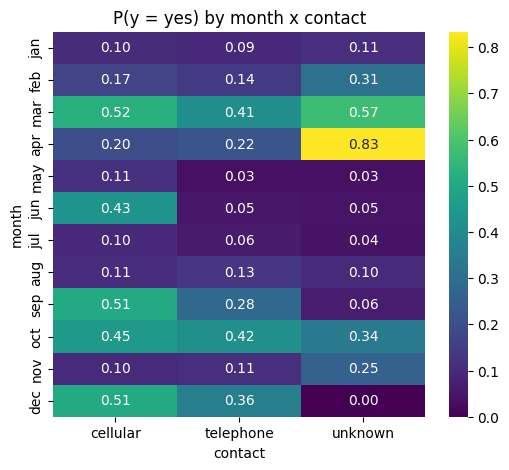

In [ ]:
# Cell 11 – 2D interaction heatmap: month x contact

if {"month", "contact"}.issubset(df.columns):
    pivot_month_contact = (
        df.pivot_table(
            index="month",
            columns="contact",
            values="y_binary",
            aggfunc="mean"
        )
        .loc[["jan","feb","mar","apr","may","jun","jul","aug","sep","oct","nov","dec"]]  # if all exist
        .dropna(how="all", axis=0)
    )

    plt.figure(figsize=(6, 5))
    sns.heatmap(pivot_month_contact, annot=True, fmt=".2f", cmap="viridis")
    plt.title("P(y = yes) by month x contact")
    plt.ylabel("month")
    plt.xlabel("contact")
    plt.show()

In [ ]:
# Cell 12 – Optional: prepare lists of numeric & categorical features for later preprocessing / modeling

target_col = "y_binary"
original_target = "y"

numeric_features = df.select_dtypes(include=[np.number]).columns.drop([target_col]).tolist()
categorical_features = df.select_dtypes(include=["object"]).columns.drop([original_target]).tolist()

print("Numeric features:", numeric_features)
print("Categorical features:", categorical_features)

Numeric features: ['age', 'campaign', 'duration', 'pdays', 'previous']
Categorical features: ['contact', 'default', 'education', 'education_raw', 'housing', 'job', 'loan', 'marital', 'month', 'poutcome']


In [ ]:
# Ensure plots show inline
%matplotlib inline

# If df is not already loaded in this session, uncomment:
# df = pd.read_csv("bank_join_common (1).csv")

target_col = "y"  # yes/no term deposit

In [ ]:
# Descriptive statistics for numeric columns
df[numeric_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
age,86399.0,40.501372,10.534861,17.0,32.0,39.0,48.0,98.0
campaign,86399.0,2.670286,2.947825,1.0,1.0,2.0,3.0,63.0
duration,86399.0,258.221206,258.362746,0.0,103.0,180.0,319.0,4918.0
pdays,86399.0,479.864616,483.829445,-1.0,-1.0,246.0,999.0,999.0
previous,86399.0,0.386127,1.713060,0.0,0.0,0.0,0.0,275.0
y_binary,86399.0,0.114920,0.318928,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Cell 13 – Basic dimensionality check (features vs samples)

# X = all features except the original target label
X_raw = df.drop(columns=[original_target])
y_raw = df[original_target]

n_samples, n_features = X_raw.shape
print(f"Number of samples (rows): {n_samples}")
print(f"Number of raw features (columns): {n_features}")

# Ratio features / samples – high ratio suggests potential curse of dimensionality
ratio = n_features / n_samples
print(f"Feature-to-sample ratio: {ratio:.4f}")

Number of samples (rows): 86399
Number of raw features (columns): 18
Feature-to-sample ratio: 0.0002


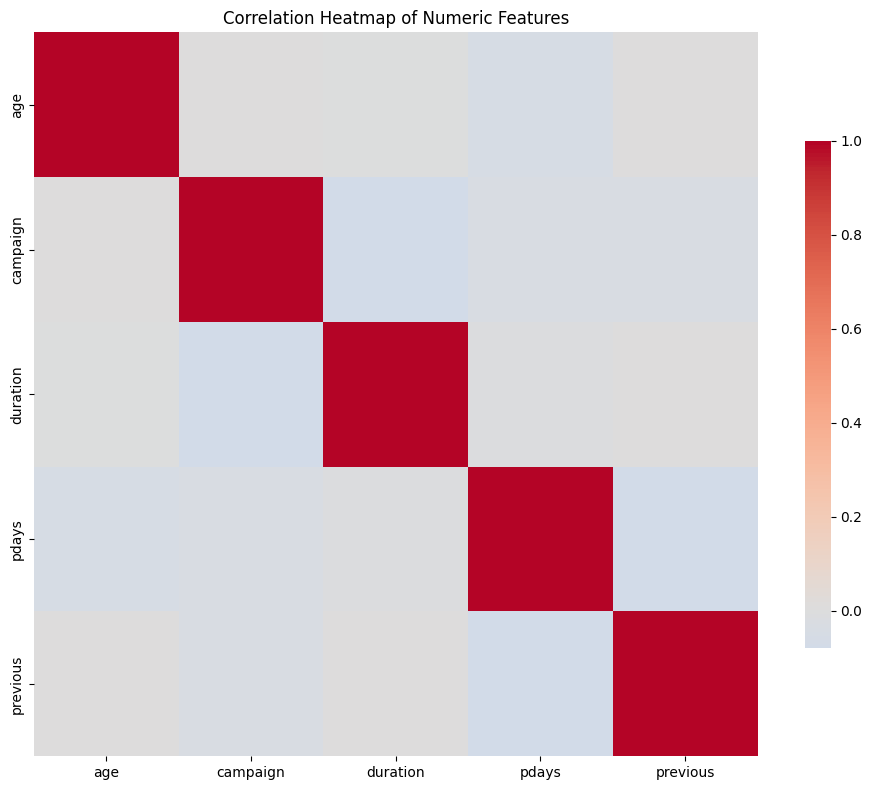

Mean absolute pairwise correlation (numeric features): 0.030


In [ ]:
# Cell 14 – Correlation between numeric features (multicollinearity / redundancy)

# If you already have numeric_features, use that; otherwise fall back to numeric_cols
if 'numeric_features' in globals():
    num_cols_for_corr = numeric_features
else:
    num_cols_for_corr = numeric_cols

corr_matrix = df[num_cols_for_corr].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    center=0,
    square=True,
    cbar_kws={"shrink": 0.7}
)
plt.title("Correlation Heatmap of Numeric Features")
plt.tight_layout()
plt.show()

# Quantify average absolute correlation (excluding diagonal)
corr_abs = corr_matrix.abs()
upper_tri = corr_abs.where(np.triu(np.ones(corr_abs.shape), k=1).astype(bool))
mean_abs_corr = upper_tri.stack().mean()
print(f"Mean absolute pairwise correlation (numeric features): {mean_abs_corr:.3f}")

In [ ]:
# Cell 15 – Variance Inflation Factor (VIF) to show multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Work on numeric features only, drop rows with NaNs
if 'numeric_features' in globals():
    num_cols_for_vif = numeric_features
else:
    num_cols_for_vif = numeric_cols

X_num = df[num_cols_for_vif].dropna().copy()

vif_data = pd.DataFrame()
vif_data["feature"] = X_num.columns
vif_data["VIF"] = [variance_inflation_factor(X_num.values, i)
                   for i in range(X_num.shape[1])]

vif_data_sorted = vif_data.sort_values(by="VIF", ascending=False)
display(vif_data_sorted)

# Quick summary
high_vif_threshold = 5.0
n_high_vif = (vif_data_sorted["VIF"] > high_vif_threshold).sum()
print(f"\nNumber of numeric features with VIF > {high_vif_threshold}: {n_high_vif}")

,feature,VIF
0,age,3.400096
2,duration,1.886412
3,pdays,1.842036
1,campaign,1.738214
4,previous,1.053105



Number of numeric features with VIF > 5.0: 0


In [ ]:
# Cell 16 – One-hot encoding of categorical features to show feature explosion & sparsity

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Ensure we have numeric_features and categorical_features from earlier EDA
print("Numeric features used for encoding:", numeric_features)
print("Categorical features used for encoding:", categorical_features)

X = df.drop(columns=[original_target])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=True), categorical_features),
    ]
)

X_encoded = preprocessor.fit_transform(X)

print("Encoded design matrix shape:", X_encoded.shape)

# If sparse, compute density (how full the matrix is)
if hasattr(X_encoded, "nnz"):
    density = X_encoded.nnz / (X_encoded.shape[0] * X_encoded.shape[1])
    print(f"Sparse matrix density: {density:.6f}")
else:
    print("Encoded matrix is dense (not sparse).")

# Count number of features originating from categorical one-hot
ohe = preprocessor.named_transformers_["cat"]
n_cat_features = len(ohe.get_feature_names_out(categorical_features))
n_num_features = len(numeric_features)
print(f"Numeric features: {n_num_features}")
print(f"One-hot categorical features: {n_cat_features}")
print(f"Total features after encoding: {X_encoded.shape[1]}")

Numeric features used for encoding: ['age', 'campaign', 'duration', 'pdays', 'previous']
Categorical features used for encoding: ['contact', 'default', 'education', 'housing', 'job', 'loan', 'marital', 'month', 'poutcome']
Encoded design matrix shape: (86399, 53)
Sparse matrix density: 0.248310
Numeric features: 5
One-hot categorical features: 48
Total features after encoding: 53


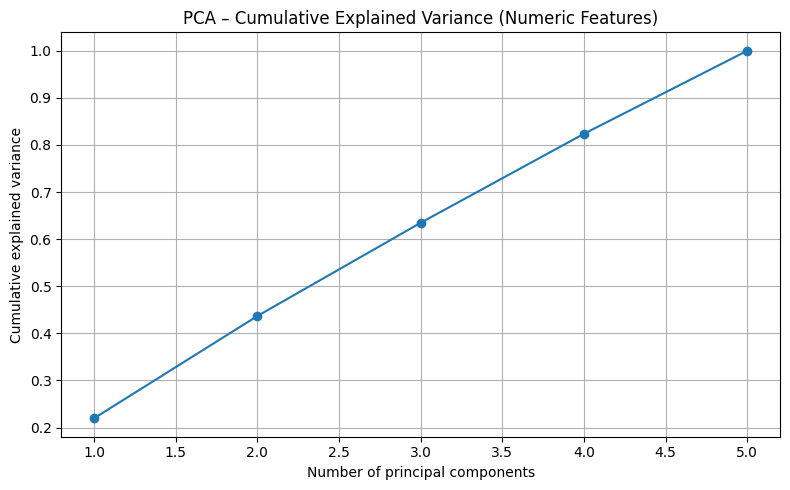

2 components explain 43.67% of variance
5 components explain 100.00% of variance


In [ ]:
# Cell 17 – PCA on standardized numeric features to show how few components explain most variance

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Work only with numeric features for this analysis
X_num_full = df[num_cols_for_corr].dropna()

scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X_num_full)

pca = PCA()
pca.fit(X_num_scaled)

explained_var = pca.explained_variance_ratio_
cum_explained = np.cumsum(explained_var)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cum_explained) + 1), cum_explained, marker="o")
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative explained variance")
plt.grid(True)
plt.title("PCA – Cumulative Explained Variance (Numeric Features)")
plt.tight_layout()
plt.show()

for k in [2, 5, 10, 15]:
    if k <= len(cum_explained):
        print(f"{k} components explain {cum_explained[k-1]*100:.2f}% of variance")

In [ ]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier

from sklearn.decomposition import PCA
from sklearn.random_projection import SparseRandomProjection

from sklearn.metrics import accuracy_score, roc_auc_score

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import TruncatedSVD

In [ ]:
from sklearn.preprocessing import FunctionTransformer
from scipy import sparse

def to_dense(X):
    if sparse.issparse(X):
        return X.toarray()
    return X

dense_transformer = FunctionTransformer(to_dense, accept_sparse=True)

In [ ]:
target_col = "y_binary"

numeric_features = ["age", "campaign", "duration", "pdays", "previous"]
categorical_features = [
    "contact", "default", "education",
    "housing", "job", "loan",
    "marital", "month", "poutcome"
]

X = df[numeric_features + categorical_features]
y = df[target_col]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

In [ ]:
from scipy import sparse

preprocessor_sparse = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(
            handle_unknown="ignore",
            sparse_output=True
        ), categorical_features)
    ]
)

In [ ]:
preprocessor_dense = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(
            handle_unknown="ignore",
            sparse_output=False
        ), categorical_features)
    ]
)

In [ ]:
smote = SMOTE(
    sampling_strategy=0.5,
    random_state=42
)

In [ ]:
def train_eval(model, Xtr, ytr, Xte, yte, use_proba=True):
    start = time.time()
    model.fit(Xtr, ytr)
    train_time = time.time() - start

    clf = model.named_steps.get("clf")

    if isinstance(clf, LinearRegression):
        y_cont = model.predict(Xte)
        y_pred = (y_cont >= 0.5).astype(int)
        acc = accuracy_score(yte, y_pred)
        auc = None
    else:
        y_pred = model.predict(Xte)
        acc = accuracy_score(yte, y_pred)

        if use_proba and hasattr(model, "predict_proba"):
            y_prob = model.predict_proba(Xte)[:, 1]
            auc = roc_auc_score(yte, y_prob)
        else:
            auc = None

    return train_time, acc, auc

In [ ]:
models_base = {
    # ---- Sparse-friendly (linear) models ----
    "LogReg": ImbPipeline([
        ("prep", preprocessor_sparse),
        ("smote", smote),
        ("clf", LogisticRegression(
            max_iter=500,
            class_weight="balanced"
        ))
    ]),

    "FastLR_SGD": ImbPipeline([
        ("prep", preprocessor_sparse),
        ("smote", smote),
        ("clf", SGDClassifier(
            loss="log_loss",
            max_iter=1000,
            random_state=42
        ))
    ]),

    "LinearSVM": ImbPipeline([
        ("prep", preprocessor_sparse),
        ("smote", smote),
        ("clf", LinearSVC(
            class_weight="balanced",
            random_state=42
        ))
    ]),

    # ---- Dense-only models ----
    "LinearReg": ImbPipeline([
        ("prep", preprocessor_dense),
        ("smote", smote),
        ("clf", LinearRegression())
    ]),

    "RandomForest": ImbPipeline([
        ("prep", preprocessor_dense),
        ("smote", smote),
        ("clf", RandomForestClassifier(
            n_estimators=100,
            max_depth=10,
            n_jobs=-1,
            random_state=42
        ))
    ]),

    "GradBoost": ImbPipeline([
        ("prep", preprocessor_dense),
        ("clf", HistGradientBoostingClassifier(
            max_depth=8,
            random_state=42
        ))
    ])
}

In [ ]:
results = []

for name, model in models_base.items():
    use_proba = name not in ["LinearSVM", "LinearReg"]
    t, acc, auc = train_eval(
        model, X_train, y_train, X_test, y_test, use_proba
    )
    results.append([name, "None", t, acc, auc])

results_base = pd.DataFrame(
    results,
    columns=["Model", "Reduction", "TrainTime", "Accuracy", "AUC"]
)

results_base

,Model,Reduction,TrainTime,Accuracy,AUC
0,LogReg,None,4.297114,0.845486,0.906370
1,FastLR_SGD,None,4.704149,0.870081,0.904359
2,LinearSVM,None,4.953743,0.850116,NaN
3,LinearReg,None,1.107712,0.890336,NaN
4,RandomForest,None,10.312071,0.893692,0.918925
5,GradBoost,None,3.594649,0.905729,0.927495


In [ ]:
models_pca = {}

for name, base_model in models_base.items():

    # Sparse-output models → TruncatedSVD
    if name in ["LogReg", "FastLR_SGD", "LinearSVM"]:
        reducer = TruncatedSVD(
            n_components=5,       # from EDA: 5 components explain ~100% variance
            random_state=42
        )
        prep = preprocessor_sparse

    # Dense-output models → PCA
    else:
        reducer = PCA(
            n_components=5,       # fixed based on EDA
            svd_solver="randomized",
            random_state=42
        )
        prep = preprocessor_dense

    models_pca[name] = ImbPipeline([
        ("prep", prep),
        ("reduce", reducer),
        ("smote", smote),
        ("clf", base_model.named_steps["clf"])
    ])

In [ ]:
results_pca = []

for name, model in models_pca.items():
    use_proba = name not in ["LinearSVM", "LinearReg"]
    t, acc, auc = train_eval(
        model, X_train, y_train, X_test, y_test, use_proba
    )
    results_pca.append([name, "PCA", t, acc, auc])

results_pca = pd.DataFrame(
    results_pca,
    columns=["Model", "Reduction", "TrainTime", "Accuracy", "AUC"]
)

results_pca

,Model,Reduction,TrainTime,Accuracy,AUC
0,LogReg,PCA,0.722875,0.781308,0.825900
1,FastLR_SGD,PCA,0.839524,0.859491,0.826322
2,LinearSVM,PCA,0.676202,0.789294,NaN
3,LinearReg,PCA,1.648046,0.879340,NaN
4,RandomForest,PCA,24.605460,0.862211,0.875805
5,GradBoost,PCA,2.901363,0.856655,0.881112


In [ ]:
models_jl = {}

for name, base_model in models_base.items():
    prep = (
        preprocessor_sparse
        if name in ["LogReg", "FastLR_SGD", "LinearSVM"]
        else preprocessor_dense
    )

    models_jl[name] = ImbPipeline([
        ("prep", prep),
        ("jl", SparseRandomProjection(
            n_components=30,
            random_state=42
        )),
        ("smote", smote),
        ("clf", base_model.named_steps["clf"])
    ])

In [ ]:
results_jl = []

for name, model in models_jl.items():
    use_proba = name not in ["LinearSVM", "LinearReg"]
    t, acc, auc = train_eval(
        model, X_train, y_train, X_test, y_test, use_proba
    )
    results_jl.append([name, "JL", t, acc, auc])

results_jl = pd.DataFrame(
    results_jl,
    columns=["Model", "Reduction", "TrainTime", "Accuracy", "AUC"]
)

results_jl

,Model,Reduction,TrainTime,Accuracy,AUC
0,LogReg,JL,7.257880,0.832118,0.896182
1,FastLR_SGD,JL,7.464380,0.870139,0.893672
2,LinearSVM,JL,7.535150,0.834375,NaN
3,LinearReg,JL,1.437839,0.887789,NaN
4,RandomForest,JL,15.522671,0.890162,0.910019
5,GradBoost,JL,4.019552,0.897338,0.912644


In [ ]:
alpha = 0.1
idx = np.random.choice(
    len(X_train),
    int(alpha * len(X_train)),
    replace=False
)

X_core = X_train.iloc[idx]
y_core = y_train.iloc[idx]

In [ ]:
core_model = Pipeline([
    ("prep", preprocessor_sparse),
    ("clf", LogisticRegression(
        max_iter=500,
        class_weight="balanced"
    ))
])

start = time.time()
core_model.fit(X_core, y_core)
t_core = time.time() - start

y_pred = core_model.predict(X_test)
acc_core = accuracy_score(y_test, y_pred)

t_core, acc_core

(0.26854729652404785, 0.8337962962962963)

In [ ]:
final_results = pd.concat(
    [results_base, results_pca, results_jl],
    ignore_index=True
)

final_results

,Model,Reduction,TrainTime,Accuracy,AUC
0,LogReg,None,4.297114,0.845486,0.906370
1,FastLR_SGD,None,4.704149,0.870081,0.904359
2,LinearSVM,None,4.953743,0.850116,NaN
3,LinearReg,None,1.107712,0.890336,NaN
4,RandomForest,None,10.312071,0.893692,0.918925
5,GradBoost,None,3.594649,0.905729,0.927495
6,LogReg,PCA,0.722875,0.781308,0.825900
7,FastLR_SGD,PCA,0.839524,0.859491,0.826322
8,LinearSVM,PCA,0.676202,0.789294,NaN
9,LinearReg,PCA,1.648046,0.879340,NaN


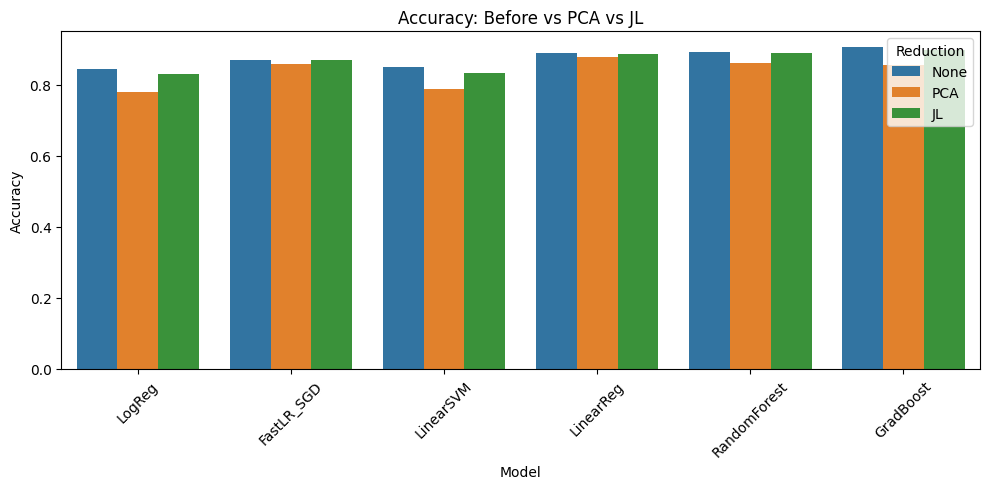

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(
    data=final_results,
    x="Model", y="Accuracy", hue="Reduction"
)
plt.xticks(rotation=45)
plt.title("Accuracy: Before vs PCA vs JL")
plt.tight_layout()
plt.show()

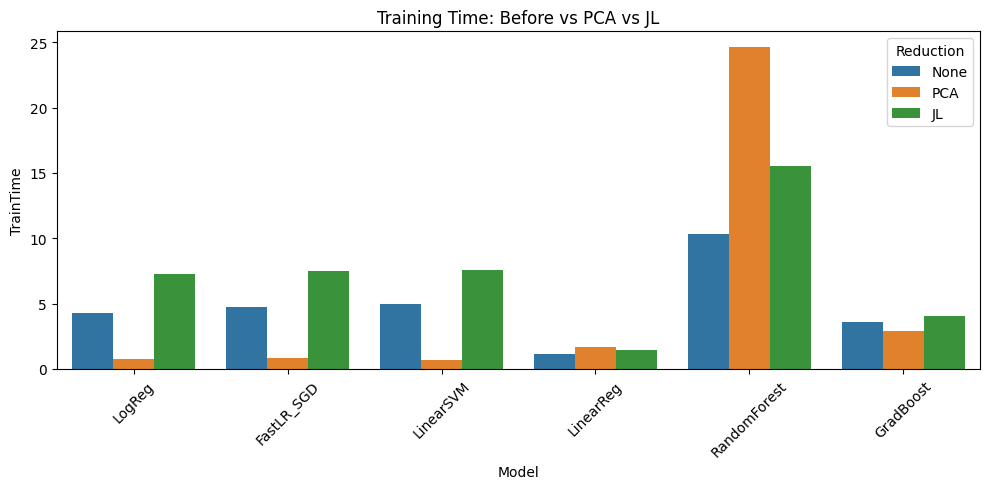

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(
    data=final_results,
    x="Model", y="TrainTime", hue="Reduction"
)
plt.xticks(rotation=45)
plt.title("Training Time: Before vs PCA vs JL")
plt.tight_layout()
plt.show()

In [ ]:
models_base_nosmote = {
    # Sparse-friendly linear models
    "LogReg": Pipeline([
        ("prep", preprocessor_sparse),
        ("clf", LogisticRegression(
            max_iter=500,
            class_weight="balanced"   # still fair, no synthetic data
        ))
    ]),

    "FastLR_SGD": Pipeline([
        ("prep", preprocessor_sparse),
        ("clf", SGDClassifier(
            loss="log_loss",
            max_iter=1000,
            random_state=42,
            class_weight="balanced"
        ))
    ]),

    "LinearSVM": Pipeline([
        ("prep", preprocessor_sparse),
        ("clf", LinearSVC(
            class_weight="balanced",
            random_state=42
        ))
    ]),

    # Dense-only models
    "LinearReg": Pipeline([
        ("prep", preprocessor_dense),
        ("clf", LinearRegression())
    ]),

    "RandomForest": Pipeline([
        ("prep", preprocessor_dense),
        ("clf", RandomForestClassifier(
            n_estimators=100,
            max_depth=10,
            n_jobs=-1,
            random_state=42
        ))
    ]),

    "GradBoost": Pipeline([
        ("prep", preprocessor_dense),
        ("clf", HistGradientBoostingClassifier(
            max_depth=8,
            random_state=42
        ))
    ])
}

In [ ]:
results_nosmote_base = []

for name, model in models_base_nosmote.items():
    use_proba = name not in ["LinearSVM", "LinearReg"]
    t, acc, auc = train_eval(
        model,
        X_train, y_train,
        X_test, y_test,
        use_proba
    )
    results_nosmote_base.append([name, "None_NoSMOTE", t, acc, auc])

results_nosmote_base = pd.DataFrame(
    results_nosmote_base,
    columns=["Model", "Reduction", "TrainTime", "Accuracy", "AUC"]
)

results_nosmote_base

,Model,Reduction,TrainTime,Accuracy,AUC
0,LogReg,None_NoSMOTE,1.868601,0.843171,0.908530
1,FastLR_SGD,None_NoSMOTE,1.805696,0.860764,0.907457
2,LinearSVM,None_NoSMOTE,1.016717,0.849074,NaN
3,LinearReg,None_NoSMOTE,0.714968,0.899942,NaN
4,RandomForest,None_NoSMOTE,9.467851,0.899537,0.918587
5,GradBoost,None_NoSMOTE,3.492758,0.905729,0.927495


In [ ]:
models_pca_nosmote = {}

for name, base_model in models_base_nosmote.items():

    # Sparse models → TruncatedSVD
    if name in ["LogReg", "FastLR_SGD", "LinearSVM"]:
        reducer = TruncatedSVD(
            n_components=5,     # from EDA
            random_state=42
        )
        prep = preprocessor_sparse

    # Dense models → PCA
    else:
        reducer = PCA(
            n_components=5,     # from EDA
            svd_solver="randomized",
            random_state=42
        )
        prep = preprocessor_dense

    models_pca_nosmote[name] = Pipeline([
        ("prep", prep),
        ("reduce", reducer),
        ("clf", base_model.named_steps["clf"])
    ])

In [ ]:
results_nosmote_pca = []

for name, model in models_pca_nosmote.items():
    use_proba = name not in ["LinearSVM", "LinearReg"]
    t, acc, auc = train_eval(
        model,
        X_train, y_train,
        X_test, y_test,
        use_proba
    )
    results_nosmote_pca.append([name, "PCA_NoSMOTE", t, acc, auc])

results_nosmote_pca = pd.DataFrame(
    results_nosmote_pca,
    columns=["Model", "Reduction", "TrainTime", "Accuracy", "AUC"]
)

results_nosmote_pca

,Model,Reduction,TrainTime,Accuracy,AUC
0,LogReg,PCA_NoSMOTE,0.589429,0.780787,0.825644
1,FastLR_SGD,PCA_NoSMOTE,0.683707,0.839468,0.824564
2,LinearSVM,PCA_NoSMOTE,0.598802,0.788252,NaN
3,LinearReg,PCA_NoSMOTE,1.782689,0.888889,NaN
4,RandomForest,PCA_NoSMOTE,18.522636,0.894734,0.871444
5,GradBoost,PCA_NoSMOTE,1.656520,0.895891,0.879850


In [ ]:
models_jl_nosmote = {}

for name, base_model in models_base_nosmote.items():

    prep = (
        preprocessor_sparse
        if name in ["LogReg", "FastLR_SGD", "LinearSVM"]
        else preprocessor_dense
    )

    models_jl_nosmote[name] = Pipeline([
        ("prep", prep),
        ("jl", SparseRandomProjection(
            n_components=30,
            random_state=42
        )),
        ("clf", base_model.named_steps["clf"])
    ])

In [ ]:
results_nosmote_jl = []

for name, model in models_jl_nosmote.items():
    use_proba = name not in ["LinearSVM", "LinearReg"]
    t, acc, auc = train_eval(
        model,
        X_train, y_train,
        X_test, y_test,
        use_proba
    )
    results_nosmote_jl.append([name, "JL_NoSMOTE", t, acc, auc])

results_nosmote_jl = pd.DataFrame(
    results_nosmote_jl,
    columns=["Model", "Reduction", "TrainTime", "Accuracy", "AUC"]
)

results_nosmote_jl

,Model,Reduction,TrainTime,Accuracy,AUC
0,LogReg,JL_NoSMOTE,1.052206,0.828472,0.898317
1,FastLR_SGD,JL_NoSMOTE,0.975991,0.817014,0.898053
2,LinearSVM,JL_NoSMOTE,1.371588,0.831713,NaN
3,LinearReg,JL_NoSMOTE,0.562683,0.892766,NaN
4,RandomForest,JL_NoSMOTE,8.572640,0.899884,0.908090
5,GradBoost,JL_NoSMOTE,2.380059,0.902141,0.916109


In [ ]:
final_nosmote_results = pd.concat(
    [
        results_nosmote_base,
        results_nosmote_pca,
        results_nosmote_jl
    ],
    ignore_index=True
)

final_nosmote_results

,Model,Reduction,TrainTime,Accuracy,AUC
0,LogReg,None_NoSMOTE,1.868601,0.843171,0.908530
1,FastLR_SGD,None_NoSMOTE,1.805696,0.860764,0.907457
2,LinearSVM,None_NoSMOTE,1.016717,0.849074,NaN
3,LinearReg,None_NoSMOTE,0.714968,0.899942,NaN
4,RandomForest,None_NoSMOTE,9.467851,0.899537,0.918587
5,GradBoost,None_NoSMOTE,3.492758,0.905729,0.927495
6,LogReg,PCA_NoSMOTE,0.589429,0.780787,0.825644
7,FastLR_SGD,PCA_NoSMOTE,0.683707,0.839468,0.824564
8,LinearSVM,PCA_NoSMOTE,0.598802,0.788252,NaN
9,LinearReg,PCA_NoSMOTE,1.782689,0.888889,NaN


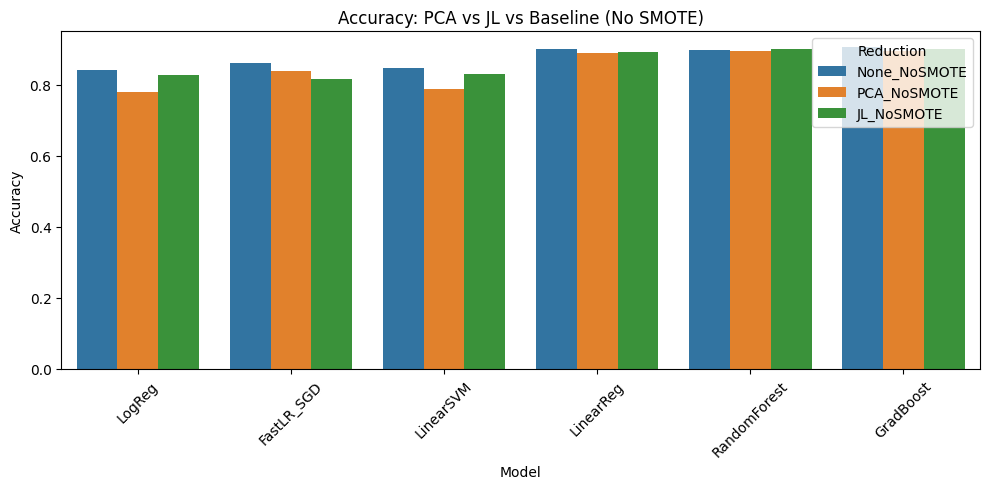

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(
    data=final_nosmote_results,
    x="Model",
    y="Accuracy",
    hue="Reduction"
)
plt.xticks(rotation=45)
plt.title("Accuracy: PCA vs JL vs Baseline (No SMOTE)")
plt.tight_layout()
plt.show()

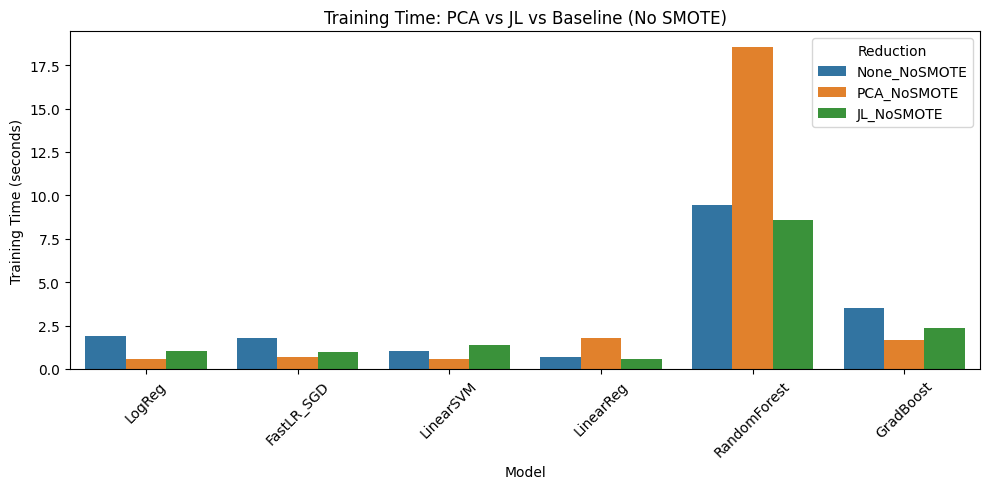

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(
    data=final_nosmote_results,
    x="Model",
    y="TrainTime",
    hue="Reduction"
)
plt.xticks(rotation=45)
plt.title("Training Time: PCA vs JL vs Baseline (No SMOTE)")
plt.ylabel("Training Time (seconds)")
plt.tight_layout()
plt.show()

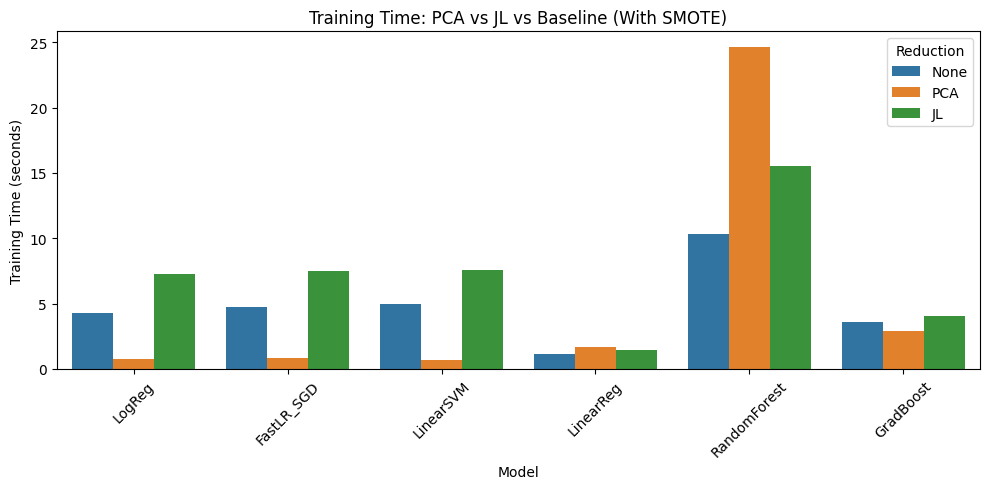

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(
    data=final_results,          # SMOTE results
    x="Model",
    y="TrainTime",
    hue="Reduction"
)
plt.xticks(rotation=45)
plt.title("Training Time: PCA vs JL vs Baseline (With SMOTE)")
plt.ylabel("Training Time (seconds)")
plt.tight_layout()
plt.show()

In [ ]:
final_all_results = pd.concat(
    [
        final_results.assign(Sampling="SMOTE"),
        final_nosmote_results.assign(Sampling="No SMOTE")
    ],
    ignore_index=True
)

final_all_results

,Model,Reduction,TrainTime,Accuracy,AUC,Sampling
0,LogReg,None,4.297114,0.845486,0.906370,SMOTE
1,FastLR_SGD,None,4.704149,0.870081,0.904359,SMOTE
2,LinearSVM,None,4.953743,0.850116,NaN,SMOTE
3,LinearReg,None,1.107712,0.890336,NaN,SMOTE
4,RandomForest,None,10.312071,0.893692,0.918925,SMOTE
5,GradBoost,None,3.594649,0.905729,0.927495,SMOTE
6,LogReg,PCA,0.722875,0.781308,0.825900,SMOTE
7,FastLR_SGD,PCA,0.839524,0.859491,0.826322,SMOTE
8,LinearSVM,PCA,0.676202,0.789294,NaN,SMOTE
9,LinearReg,PCA,1.648046,0.879340,NaN,SMOTE


In [ ]:
comparison_table = final_all_results[
    ["Model", "Sampling", "Reduction", "TrainTime", "Accuracy"]
].sort_values(by=["Model", "Sampling", "Reduction"])

comparison_table

,Model,Sampling,Reduction,TrainTime,Accuracy
31,FastLR_SGD,No SMOTE,JL_NoSMOTE,0.975991,0.817014
19,FastLR_SGD,No SMOTE,None_NoSMOTE,1.805696,0.860764
25,FastLR_SGD,No SMOTE,PCA_NoSMOTE,0.683707,0.839468
13,FastLR_SGD,SMOTE,JL,7.464380,0.870139
1,FastLR_SGD,SMOTE,None,4.704149,0.870081
7,FastLR_SGD,SMOTE,PCA,0.839524,0.859491
35,GradBoost,No SMOTE,JL_NoSMOTE,2.380059,0.902141
23,GradBoost,No SMOTE,None_NoSMOTE,3.492758,0.905729
29,GradBoost,No SMOTE,PCA_NoSMOTE,1.656520,0.895891
17,GradBoost,SMOTE,JL,4.019552,0.897338


/tmp/ipython-input-1772861375.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


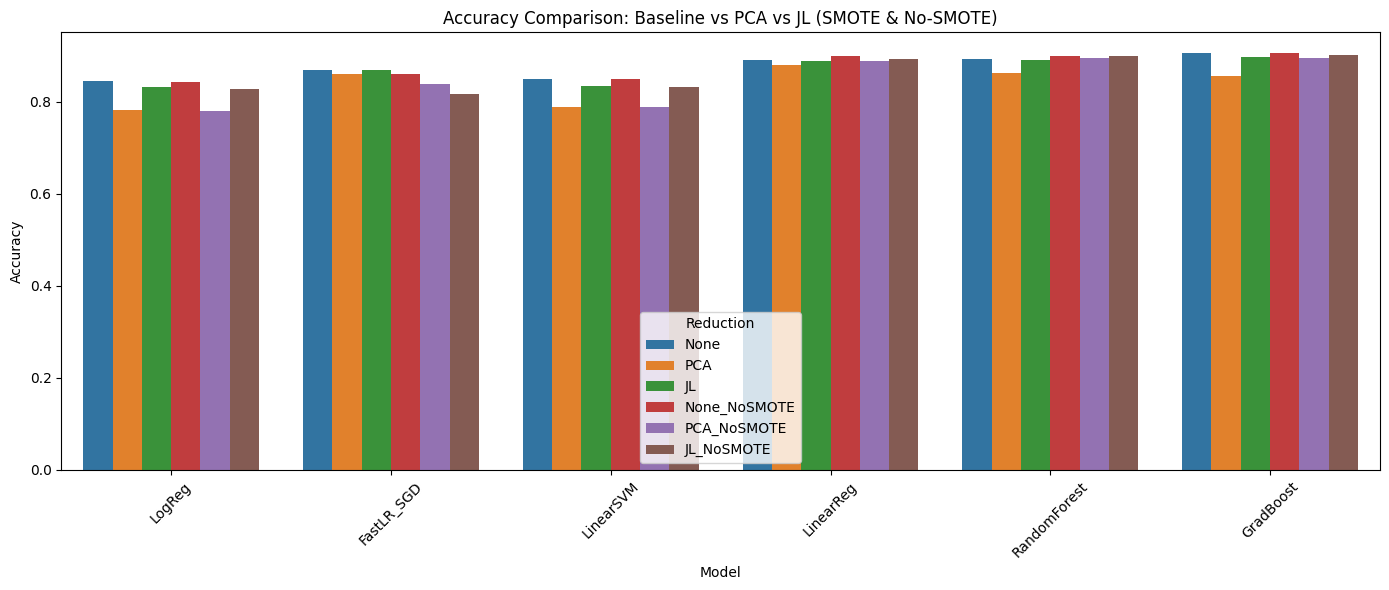

In [ ]:
plt.figure(figsize=(14,6))
sns.barplot(
    data=final_all_results,
    x="Model",
    y="Accuracy",
    hue="Reduction",
    ci=None
)
plt.title("Accuracy Comparison: Baseline vs PCA vs JL (SMOTE & No-SMOTE)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipython-input-1047798933.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


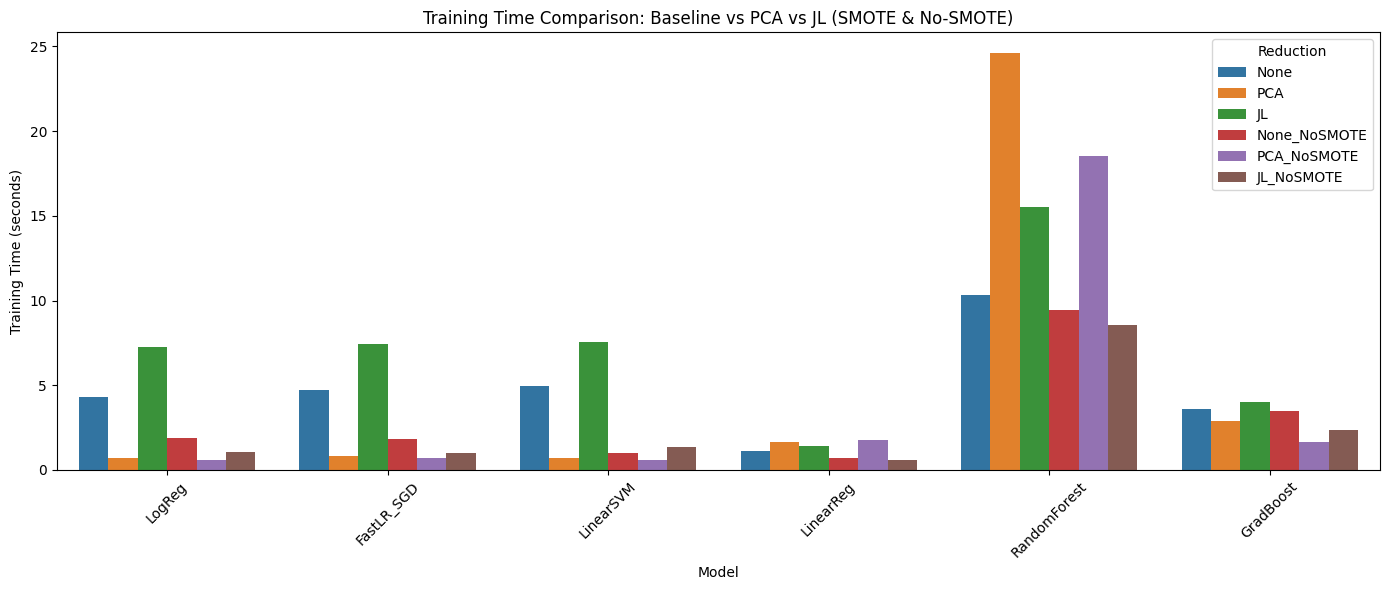

In [ ]:
plt.figure(figsize=(14,6))
sns.barplot(
    data=final_all_results,
    x="Model",
    y="TrainTime",
    hue="Reduction",
    ci=None
)
plt.title("Training Time Comparison: Baseline vs PCA vs JL (SMOTE & No-SMOTE)")
plt.ylabel("Training Time (seconds)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
speedup = final_all_results.copy()

baseline = speedup[speedup["Reduction"] == "None"][
    ["Model", "Sampling", "TrainTime"]
].rename(columns={"TrainTime": "BaselineTime"})

speedup = speedup.merge(
    baseline, on=["Model", "Sampling"], how="left"
)

speedup["Speedup"] = speedup["BaselineTime"] / speedup["TrainTime"]
speedup

,Model,Reduction,TrainTime,Accuracy,AUC,Sampling,BaselineTime,Speedup
0,LogReg,None,4.297114,0.845486,0.906370,SMOTE,4.297114,1.000000
1,FastLR_SGD,None,4.704149,0.870081,0.904359,SMOTE,4.704149,1.000000
2,LinearSVM,None,4.953743,0.850116,NaN,SMOTE,4.953743,1.000000
3,LinearReg,None,1.107712,0.890336,NaN,SMOTE,1.107712,1.000000
4,RandomForest,None,10.312071,0.893692,0.918925,SMOTE,10.312071,1.000000
5,GradBoost,None,3.594649,0.905729,0.927495,SMOTE,3.594649,1.000000
6,LogReg,PCA,0.722875,0.781308,0.825900,SMOTE,4.297114,5.944478
7,FastLR_SGD,PCA,0.839524,0.859491,0.826322,SMOTE,4.704149,5.603353
8,LinearSVM,PCA,0.676202,0.789294,NaN,SMOTE,4.953743,7.325835
9,LinearReg,PCA,1.648046,0.879340,NaN,SMOTE,1.107712,0.672137


/tmp/ipython-input-113568852.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


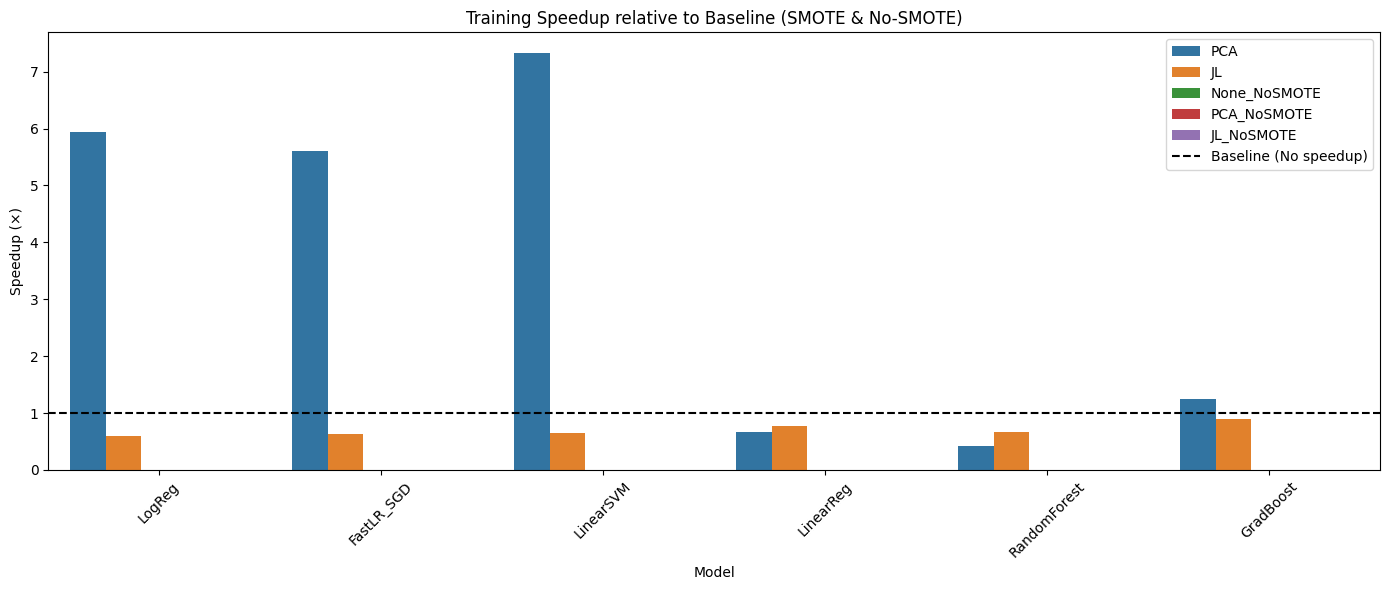

In [ ]:
plt.figure(figsize=(14,6))

sns.barplot(
    data=speedup[speedup["Reduction"] != "None"],
    x="Model",
    y="Speedup",
    hue="Reduction",
    ci=None
)

# Baseline reference
plt.axhline(
    y=1.0,
    color="black",
    linestyle="--",
    linewidth=1.5,
    label="Baseline (No speedup)"
)

plt.title("Training Speedup relative to Baseline (SMOTE & No-SMOTE)")
plt.ylabel("Speedup (×)")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# ---- CORESET EXPERIMENT (Logistic Regression only) ----

alpha = 0.1  # 10% coreset
idx = np.random.choice(len(X_train), int(alpha * len(X_train)), replace=False)

X_core = X_train.iloc[idx]
y_core = y_train.iloc[idx]

coreset_model = ImbPipeline([
    ("prep", preprocessor_sparse),
    ("clf", LogisticRegression(max_iter=500, class_weight="balanced"))
])

start = time.time()
coreset_model.fit(X_core, y_core)
core_time = time.time() - start

y_pred_core = coreset_model.predict(X_test)
core_acc = accuracy_score(y_test, y_pred_core)

core_time, core_acc

(0.1010427474975586, 0.8381944444444445)

In [ ]:
import numpy as np

# Fraction of train data to keep in the coreset
coreset_frac = 0.10  # 10%
rng = np.random.RandomState(42)

coreset_size = int(len(X_train) * coreset_frac)
coreset_idx = rng.choice(len(X_train), size=coreset_size, replace=False)

X_train_core = X_train.iloc[coreset_idx].copy()
y_train_core = y_train.iloc[coreset_idx].copy()

print("Full train size:", len(X_train))
print("Coreset train size:", len(X_train_core))

Full train size: 69119
Coreset train size: 6911


In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVC
import time

def train_eval_generic(name, model, Xtr, ytr, Xte, yte):
    """
    name: model name string (e.g., 'LogReg', 'LinearReg', ...)
    model: sklearn Pipeline (your models_base_nosmote[...] entry)
    Xtr, ytr: training data
    Xte, yte: test data

    Returns: train_time, accuracy, auc (or None if not applicable)
    """
    start = time.time()
    model.fit(Xtr, ytr)
    train_time = time.time() - start

    clf = model.named_steps["clf"]

    # --- Linear Regression: treat as regression + threshold 0.5 ---
    if isinstance(clf, LinearRegression):
        y_scores = model.predict(Xte)
        y_pred = (y_scores >= 0.5).astype(int)
        acc = accuracy_score(yte, y_pred)
        # AUC on continuous scores:
        auc = roc_auc_score(yte, y_scores)

    # --- Linear SVM: no probabilities ---
    elif isinstance(clf, LinearSVC):
        y_pred = model.predict(Xte)
        acc = accuracy_score(yte, y_pred)
        auc = None  # LinearSVC has no predict_proba

    # --- All other classifiers with predict_proba ---
    else:
        y_pred = model.predict(Xte)
        acc = accuracy_score(yte, y_pred)
        if hasattr(model, "predict_proba") or hasattr(clf, "predict_proba"):
            y_prob = model.predict_proba(Xte)[:, 1]
            auc = roc_auc_score(yte, y_prob)
        else:
            auc = None

    return train_time, acc, auc

In [ ]:
import pandas as pd

# Models for which we want to apply coreset
coreset_model_names = ["LogReg", "FastLR_SGD", "LinearSVM", "LinearReg"]

coreset_results = []

for name in coreset_model_names:
    print(f"Training {name} on coreset...")
    model = models_base_nosmote[name]
    t, acc, auc = train_eval_generic(
        name, model,
        X_train_core, y_train_core,   # coreset, not full train
        X_test, y_test
    )
    coreset_results.append([
        name,
        "Coreset_10%",    # label for the Reduction column
        len(X_train_core),
        t,
        acc,
        auc
    ])

coreset_results_df = pd.DataFrame(
    coreset_results,
    columns=["Model", "Reduction", "TrainSize", "TrainTime", "Accuracy", "AUC"]
)

coreset_results_df

Training LogReg on coreset...
Training FastLR_SGD on coreset...
Training LinearSVM on coreset...
Training LinearReg on coreset...


,Model,Reduction,TrainSize,TrainTime,Accuracy,AUC
0,LogReg,Coreset_10%,6911,0.083709,0.841551,0.906532
1,FastLR_SGD,Coreset_10%,6911,0.094648,0.855729,0.896974
2,LinearSVM,Coreset_10%,6911,0.059143,0.846586,NaN
3,LinearReg,Coreset_10%,6911,0.043825,0.899132,0.903416


In [ ]:
# If you want a combined table with coreset included:
coreset_results_for_merge = coreset_results_df[["Model", "Reduction", "TrainTime", "Accuracy", "AUC"]]

all_results_with_coreset = pd.concat(
    [final_nosmote_results, coreset_results_for_merge],
    ignore_index=True
)

all_results_with_coreset

,Model,Reduction,TrainTime,Accuracy,AUC
0,LogReg,None_NoSMOTE,1.868601,0.843171,0.908530
1,FastLR_SGD,None_NoSMOTE,1.805696,0.860764,0.907457
2,LinearSVM,None_NoSMOTE,1.016717,0.849074,NaN
3,LinearReg,None_NoSMOTE,0.714968,0.899942,NaN
4,RandomForest,None_NoSMOTE,9.467851,0.899537,0.918587
5,GradBoost,None_NoSMOTE,3.492758,0.905729,0.927495
6,LogReg,PCA_NoSMOTE,0.589429,0.780787,0.825644
7,FastLR_SGD,PCA_NoSMOTE,0.683707,0.839468,0.824564
8,LinearSVM,PCA_NoSMOTE,0.598802,0.788252,NaN
9,LinearReg,PCA_NoSMOTE,1.782689,0.888889,NaN


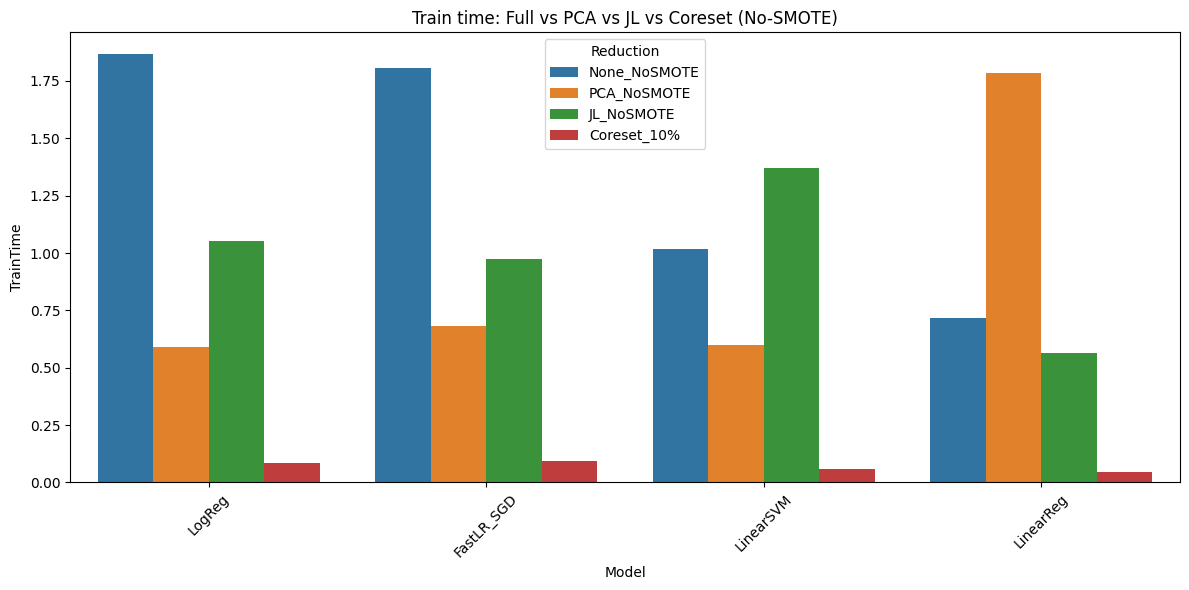

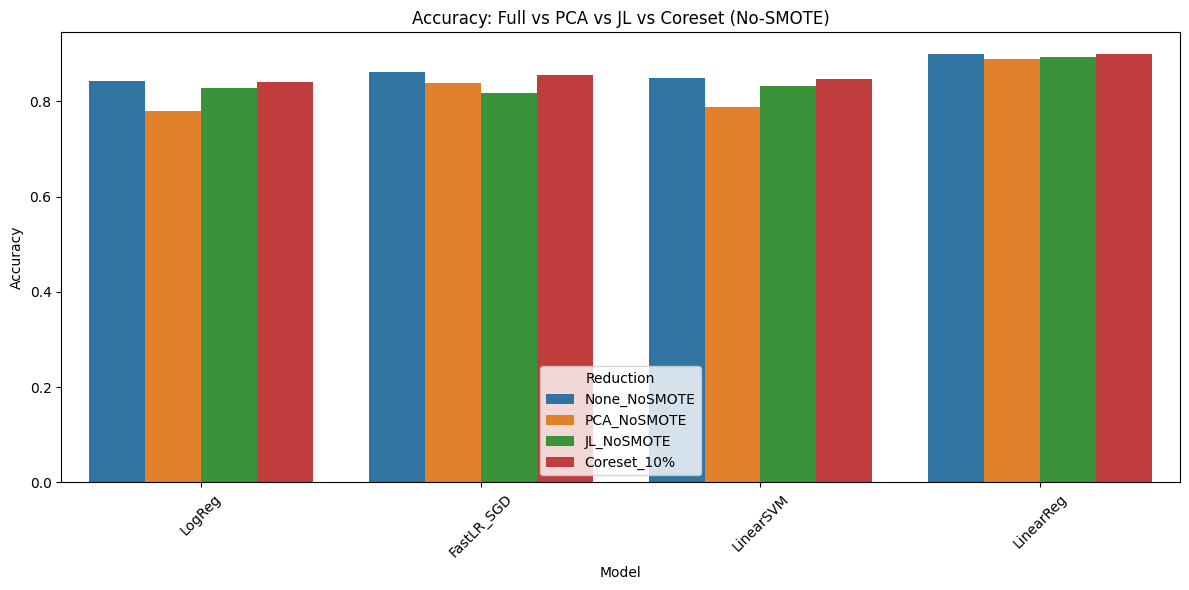

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.barplot(
    data=all_results_with_coreset[all_results_with_coreset["Model"].isin(coreset_model_names)],
    x="Model",
    y="TrainTime",
    hue="Reduction"
)
plt.title("Train time: Full vs PCA vs JL vs Coreset (No-SMOTE)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,6))
sns.barplot(
    data=all_results_with_coreset[all_results_with_coreset["Model"].isin(coreset_model_names)],
    x="Model",
    y="Accuracy",
    hue="Reduction"
)
plt.title("Accuracy: Full vs PCA vs JL vs Coreset (No-SMOTE)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()